# Water masses of the future: volume

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import gcsfs

import warnings
warnings.simplefilter("ignore")

In [3]:
fs = gcsfs.GCSFileSystem(token='anon', access='read_only')

In [4]:
cat = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
#cat = pd.read_csv('ftp://ftp.cgd.ucar.edu/archive/aletheia-data/intake-esm-datastore/catalogs/glade-cmip6.csv')
#cat.info()

In [5]:
# define a simple search on keywords
def search_df(df, verbose= False, **search):
    "search by keywords - if list, then match exactly, otherwise match as substring"
    keys = ['activity_id','institution_id','source_id','experiment_id','member_id', 'table_id', 'variable_id', 'grid_label']
    d = df
    for skey in search.keys():
        
        if isinstance(search[skey], str):  # match a string as a substring
            d = d[d[skey].str.contains(search[skey])]
        else:
            dk = []
            for key in search[skey]:       # match a list of strings exactly
                dk += [d[d[skey]==key]]
            d = pd.concat(dk)
            keys.remove(skey)
    if verbose:
        for key in keys:
            print(key,' = ',list(d[key].unique()))      
    return d

## Load CMIP6 datasets

In [6]:
picontrol = search_df(cat, experiment_id=['piControl'], 
                      source_id=['CESM2', 'GFDL-CM4'],
                      table_id='Omon', 
                      variable_id=['thetao', 'so'], 
                      grid_label=['gr'], verbose=True)

activity_id  =  ['CMIP']
institution_id  =  ['NCAR', 'NOAA-GFDL']
member_id  =  ['r1i1p1f1']
table_id  =  ['Omon']


In [7]:
historical = search_df(cat, experiment_id=['historical'], 
                       source_id=['CESM2', 'GFDL-CM4'],
                       table_id='Omon', 
                       variable_id=['thetao', 'so'], 
                       grid_label=['gr'], verbose=True)

activity_id  =  ['CMIP']
institution_id  =  ['NCAR', 'NOAA-GFDL']
member_id  =  ['r10i1p1f1', 'r11i1p1f1', 'r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1', 'r4i1p1f1', 'r5i1p1f1', 'r6i1p1f1', 'r7i1p1f1', 'r8i1p1f1', 'r9i1p1f1']
table_id  =  ['Omon']


In [8]:
ssp585 = search_df(cat, experiment_id=['ssp585'], table_id='Omon',
                   variable_id=['thetao', 'so'], 
                   grid_label=['gr'], verbose=True)

activity_id  =  ['ScenarioMIP']
institution_id  =  ['NCAR', 'NOAA-GFDL']
source_id  =  ['CESM2-WACCM', 'CESM2', 'GFDL-CM4']
member_id  =  ['r1i1p1f1', 'r2i1p1f1']
table_id  =  ['Omon']


In [10]:
#ssp585 = search_df(cat, table_id='Omon', variable_id=['thetao', 'so'], 
#                   grid_label=['gn'], verbose=True)

In [11]:
#zstores_hist = historical.zstore.unique()
#
#dset_dict_hist = {}
#for zstore in zstores_hist:
#    name = zstore.split('gs://cmip6/')[1].replace('/','.')[:-1]
#    print(name)
#
#    ds = xr.open_zarr(fs.get_mapper(zstore))       # DO NOT USE "decode_times = False"
#    print(dict(ds.dims),'\n')
#    
#    dset_dict_hist[name] = ds

In [9]:
def create_dsdict_from_cat(df):
    """ thanks naomi"""
    zstores = df.zstore.unique()

    dset_dict = {}
    for zstore in zstores:
        name = zstore.split('gs://cmip6/')[1].replace('/','.')[:-1]
        print(name)

        ds = xr.open_zarr(fs.get_mapper(zstore))       # DO NOT USE "decode_times = False"
        print(dict(ds.dims),'\n')
    
        dset_dict[name] = ds
    return dset_dict

In [10]:
dict_piC = create_dsdict_from_cat(picontrol)

CMIP.NCAR.CESM2.piControl.r1i1p1f1.Omon.thetao.gr
{'d2': 2, 'lat': 180, 'lev': 33, 'lon': 360, 'time': 14400} 

CMIP.NOAA-GFDL.GFDL-CM4.piControl.r1i1p1f1.Omon.thetao.gr
{'bnds': 2, 'lat': 180, 'lev': 35, 'lon': 360, 'time': 6000} 

CMIP.NCAR.CESM2.piControl.r1i1p1f1.Omon.so.gr
{'d2': 2, 'lat': 180, 'lev': 33, 'lon': 360, 'time': 14400} 

CMIP.NOAA-GFDL.GFDL-CM4.piControl.r1i1p1f1.Omon.so.gr
{'bnds': 2, 'lat': 180, 'lev': 35, 'lon': 360, 'time': 6000} 



In [62]:
dict_ssp585 = create_dsdict_from_cat(ssp585)

ScenarioMIP.NCAR.CESM2-WACCM.ssp585.r1i1p1f1.Omon.thetao.gr
{'d2': 2, 'lat': 180, 'lev': 33, 'lon': 360, 'time': 1032} 

ScenarioMIP.NCAR.CESM2.ssp585.r2i1p1f1.Omon.thetao.gr
{'d2': 2, 'lat': 180, 'lev': 33, 'lon': 360, 'time': 1032} 

ScenarioMIP.NOAA-GFDL.GFDL-CM4.ssp585.r1i1p1f1.Omon.thetao.gr
{'bnds': 2, 'lat': 180, 'lev': 35, 'lon': 360, 'time': 1032} 

ScenarioMIP.NCAR.CESM2-WACCM.ssp585.r1i1p1f1.Omon.so.gr
{'d2': 2, 'lat': 180, 'lev': 33, 'lon': 360, 'time': 1032} 

ScenarioMIP.NCAR.CESM2.ssp585.r2i1p1f1.Omon.so.gr
{'d2': 2, 'lat': 180, 'lev': 33, 'lon': 360, 'time': 1032} 

ScenarioMIP.NOAA-GFDL.GFDL-CM4.ssp585.r1i1p1f1.Omon.so.gr
{'bnds': 2, 'lat': 180, 'lev': 35, 'lon': 360, 'time': 1032} 



## First test with xhistogram

In [11]:
from xhistogram.xarray import histogram

In [12]:
CM4_thetao_piC = dict_piC['CMIP.NOAA-GFDL.GFDL-CM4.piControl.r1i1p1f1.Omon.thetao.gr']
#CM4_thetao_piC['lev']

In [13]:
CM4_so_piC = dict_piC['CMIP.NOAA-GFDL.GFDL-CM4.piControl.r1i1p1f1.Omon.so.gr']
#CM4_so_piC['so']

In [14]:
CESM2_so_piC = dict_piC['CMIP.NCAR.CESM2.piControl.r1i1p1f1.Omon.so.gr']

In [15]:
CESM2_thetao_piC = dict_piC['CMIP.NCAR.CESM2.piControl.r1i1p1f1.Omon.thetao.gr']

In [35]:
CESM2_thetao_piC

<xarray.Dataset>
Dimensions:    (d2: 2, lat: 180, lev: 33, lon: 360, time: 14400)
Coordinates:
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bnds   (lat, d2) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lev        (lev) float64 0.0 10.0 20.0 30.0 ... 4e+03 4.5e+03 5e+03 5.5e+03
    lev_bnds   (lev, d2) float64 dask.array<chunksize=(33, 2), meta=np.ndarray>
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    lon_bnds   (lon, d2) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
  * time       (time) object 0001-01-15 12:59:59 ... 1200-12-15 12:00:00
    time_bnds  (time, d2) object dask.array<chunksize=(14400, 2), meta=np.ndarray>
Dimensions without coordinates: d2
Data variables:
    thetao     (time, lev, lat, lon) float32 dask.array<chunksize=(11, 33, 180, 360), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          st

### Set up bins and volume of cells for histogram

In [16]:
sbins = np.arange(31, 38, 0.025)
tbins = np.arange(-2, 32, 0.1)

In [17]:
# Create a dz variable, all datasets are on common grid so this should work with everything
dz = np.diff(CESM2_thetao_piC['lev'])
dz =np.insert(dz, 0, dz[0])
dz = xr.DataArray(dz, coords= {'lev': CESM2_thetao_piC['lev']}, dims='lev')

# weight by volume of grid cell (resolution = 5degree, 1degree=110km)
dVol_cesm2 = dz * (110e3) * (110e3*np.cos(CESM2_thetao_piC['lat']*np.pi/180))

In [18]:
# not quite
dz = np.diff(CM4_thetao_piC['lev'])
dz =np.insert(dz, 0, dz[0])
dz = xr.DataArray(dz, coords= {'lev': CM4_thetao_piC['lev']}, dims='lev')

# weight by volume of grid cell (resolution = 5degree, 1degree=110km)
dVol_cm4 = dz * (110e3) * (110e3*np.cos(CM4_thetao_piC['lat']*np.pi/180))

In [19]:
assert (dVol_cesm2 == dVol_cm4).all()

AssertionError: 

### Let's get this party started

In [20]:
from dask_kubernetes import KubeCluster
from dask.distributed import Client
cluster = KubeCluster()
cluster.adapt(minimum=1, maximum=10)
client = Client(cluster)
cluster

In [21]:
#cluster.close()

### CESM2 - piControl

In [53]:
hTS_CESM2 = histogram(CESM2_so_piC['so'],
                      CESM2_thetao_piC['thetao'],
                      bins=[sbins, tbins],
                      dim=('lon', 'lat', 'lev'),
                      weights=dVol_cesm2)

In [54]:
hTS_CESM2

<xarray.DataArray 'histogram_so_thetao' (time: 14400, so_bin: 279, thetao_bin: 339)>
dask.array<getitem, shape=(14400, 279, 339), dtype=float64, chunksize=(11, 279, 339), chunktype=numpy.ndarray>
Coordinates:
  * time        (time) object 0001-01-15 12:59:59 ... 1200-12-15 12:00:00
  * so_bin      (so_bin) float64 31.01 31.04 31.06 31.09 ... 37.91 37.94 37.96
  * thetao_bin  (thetao_bin) float64 -1.95 -1.85 -1.75 ... 31.65 31.75 31.85

In [56]:
vol_nadw_CESM2 = hTS_CESM2.sel(so_bin=slice(34.8, 35.), 
                               thetao_bin=slice(1.5,4)).sum(dim=['so_bin', 'thetao_bin'])

In [57]:
vol_nadw_CESM2.load()

distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://10.32.5.12:41840 remote=tcp://10.32.5.12:38325>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://10.32.5.12:41842 remote=tcp://10.32.5.12:38325>


<xarray.DataArray 'histogram_so_thetao' (time: 14400)>
array([1.19804457e+17, 1.19808830e+17, 1.19838399e+17, ...,
       2.08909331e+17, 2.08857520e+17, 2.08815188e+17])
Coordinates:
  * time     (time) object 0001-01-15 12:59:59 ... 1200-12-15 12:00:00

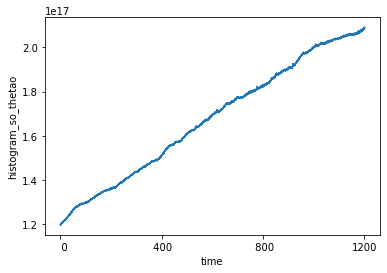

In [58]:
vol_nadw_CESM2.plot()

In [37]:
basincodes = xr.open_dataset('../data/basin_codes.r360x180.nc')

basincodes = basincodes.rename({'Longitude': 'lon', 'Latitude': 'lat'})
basincodes['lon'] = CESM2_so_piC['lon']
basincodes['lat'] = CESM2_so_piC['lat']

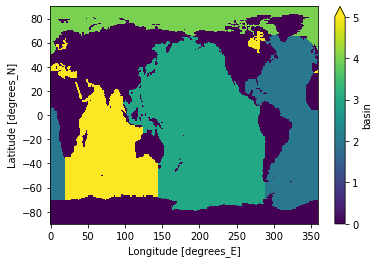

In [34]:
basincodes['basin'].plot(vmin=0, vmax=5)

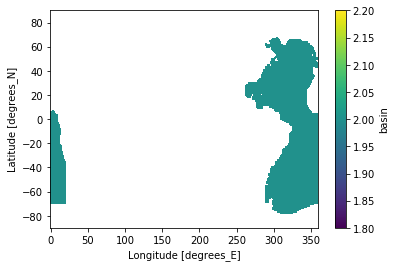

In [32]:
basincodes['basin'].where(basincodes['basin'] == 2).plot()

In [38]:
hTS_CESM2 = histogram(CESM2_so_piC['so'].where(basincodes['basin'] == 2),
                      CESM2_thetao_piC['thetao'].where(basincodes['basin'] == 2),
                      bins=[sbins, tbins],
                      dim=('lon', 'lat', 'lev'),
                      weights=dVol_cesm2)

In [39]:
atl_vol_nadw_CESM2 = hTS_CESM2.sel(so_bin=slice(34.8, 35.), 
                                   thetao_bin=slice(1.5,4)).sum(dim=['so_bin', 'thetao_bin'])

In [40]:
atl_vol_nadw_CESM2.load()

<xarray.DataArray 'histogram_so_thetao' (time: 14400)>
array([3.21612203e+16, 3.21588890e+16, 3.21407182e+16, ...,
       4.64435566e+16, 4.64352302e+16, 4.63825674e+16])
Coordinates:
  * time     (time) object 0001-01-15 12:59:59 ... 1200-12-15 12:00:00

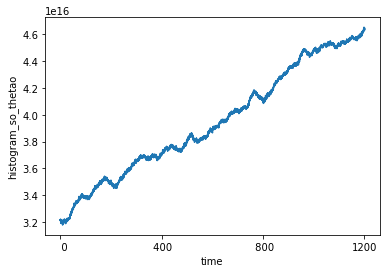

In [41]:
atl_vol_nadw_CESM2.plot()

In [22]:
hTS_CM4 = histogram(CM4_so_piC['so'],
                    CM4_thetao_piC['thetao'],
                    bins=[sbins, tbins],
                    dim=('lon', 'lat', 'lev'),
                    weights=dVol_cm4)

In [56]:
#assert (CM4_so_piC['so'].lev.values == CM4_thetao_piC['thetao'].lev.values).all()

In [23]:
#CM4_so_pic = CM4_so_piC.unify_chunks()
#CM4_so_pic = CM4_so_piC.chunks({'time': 25})

In [24]:
#hTS_CM4 = histogram(CM4_so_piC['so'],
#                    CM4_thetao_piC['thetao'],
#                    bins=[sbins, tbins],
#                    dim=('lon', 'lat', 'lev'),
#                    weights=dVol_cm4)

In [25]:
vol_nadw_CM4 = hTS_CM4.sel(so_bin=slice(34.8, 35.), 
                           thetao_bin=slice(1.5,4)).sum(dim=['so_bin', 'thetao_bin'])

In [26]:
vol_nadw_CM4.load()

<xarray.DataArray 'histogram_so_thetao' (time: 6000)>
array([1.19443985e+17, 1.19323221e+17, 1.19432044e+17, ...,
       1.14538570e+17, 1.14615831e+17, 1.14692345e+17])
Coordinates:
  * time     (time) object 0151-01-16 12:00:00 ... 0650-12-16 12:00:00

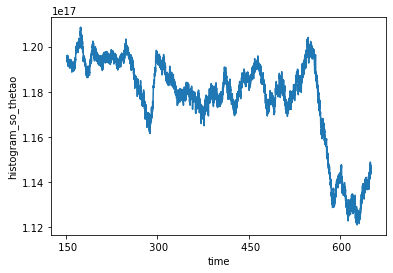

In [27]:
vol_nadw_CM4.plot()

In [42]:
basincodes = xr.open_dataset('../data/basin_codes.r360x180.nc')

basincodes = basincodes.rename({'Longitude': 'lon', 'Latitude': 'lat'})
basincodes['lon'] = CM4_so_piC['lon']
basincodes['lat'] = CM4_so_piC['lat']

In [43]:
hTS_CM4 = histogram(CM4_so_piC['so'].where(basincodes['basin'] == 2),
                    CM4_thetao_piC['thetao'].where(basincodes['basin'] ==2),
                    bins=[sbins, tbins],
                    dim=('lon', 'lat', 'lev'),
                    weights=dVol_cm4)

In [44]:
CM4_so_piC['lon']

<xarray.DataArray 'lon' (lon: 360)>
array([  0.5,   1.5,   2.5, ..., 357.5, 358.5, 359.5])
Coordinates:
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Attributes:
    axis:           X
    bounds:         lon_bnds
    cell_methods:   time: point
    long_name:      longitude
    standard_name:  longitude
    units:          degrees_east

In [45]:
atl_vol_nadw_CM4 = hTS_CM4.sel(so_bin=slice(34.8, 35.), 
                               thetao_bin=slice(1.5,4)).sum(dim=['so_bin', 'thetao_bin'])

In [46]:
atl_vol_nadw_CM4.load()

<xarray.DataArray 'histogram_so_thetao' (time: 6000)>
array([1.12950504e+17, 1.12857794e+17, 1.12903703e+17, ...,
       1.01668720e+17, 1.01758251e+17, 1.01950041e+17])
Coordinates:
  * time     (time) object 0151-01-16 12:00:00 ... 0650-12-16 12:00:00

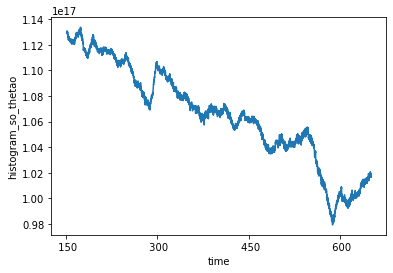

In [47]:
atl_vol_nadw_CM4.plot()